In [ ]:
import pandas as pd
import numpy as nmp
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Zomato data .csv')

In [ ]:
print(df)

                      name online_order book_table  rate  votes  \
0                    Jalsa          Yes        Yes   4.1    775   
1           Spice Elephant          Yes         No   4.1    787   
2          San Churro Cafe          Yes         No   3.8    918   
3    Addhuri Udupi Bhojana           No         No   3.7     88   
4            Grand Village           No         No   3.8    166   
..                     ...          ...        ...   ...    ...   
143       Melting Melodies           No         No   3.3      0   
144        New Indraprasta           No         No   3.3      0   
145           Anna Kuteera          Yes         No   4.0    771   
146                 Darbar           No         No   3.0     98   
147          Vijayalakshmi          Yes         No   3.9     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            800          

df['rate'] = float( df['rate'].str.split('/').str[0])
print(df['rate'])

In [ ]:
df['rate'] = df['rate'].str.split('/').str[0]
print(df['rate'])

0      4.1
1      4.1
2      3.8
3      3.7
4      3.8
      ... 
143    3.3
144    3.3
145    4.0
146    3.0
147    3.9
Name: rate, Length: 148, dtype: object


In [ ]:
df['rate'] = df['rate'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


<ipython-input-33-c095578cefd4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='listed_in(type)', data=df, palette='pastel')


([<matplotlib.axis.YTick at 0x7fd18aa78d10>,
 [Text(0, 0, '0'),
  Text(0, 8, '8'),
  Text(0, 16, '16'),
  Text(0, 24, '24'),
  Text(0, 32, '32'),
  Text(0, 40, '40'),
  Text(0, 48, '48'),
  Text(0, 56, '56'),
  Text(0, 64, '64'),
  Text(0, 72, '72'),
  Text(0, 80, '80'),
  Text(0, 88, '88'),
  Text(0, 96, '96'),
  Text(0, 104, '104'),
  Text(0, 112, '112')])

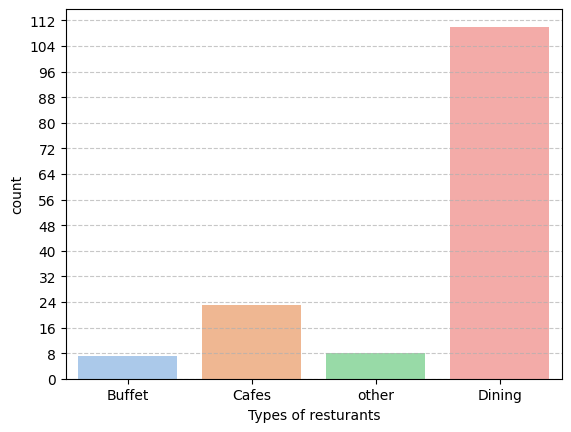

In [ ]:
sns.countplot(x=df['listed_in(type)'])

plt.xlabel('Types of resturants')
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.countplot(x='listed_in(type)', data=df, palette='pastel')


# Set y-axis interval dynamically without using np
y_max = df['listed_in(type)'].value_counts().max()
tick_interval = 8  # Set interval to 5
plt.yticks(range(0, y_max + tick_interval, tick_interval))

Text(0, 0.5, 'Votes ')

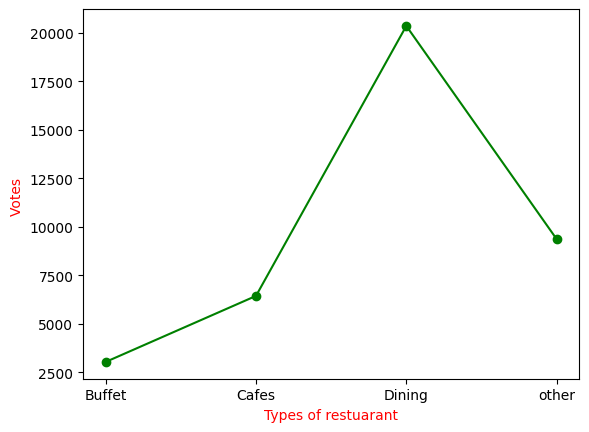

In [ ]:
gd = df.groupby('listed_in(type)')['votes'].sum()
rs = pd.DataFrame({'votes' : gd })
plt.plot(rs , c = "green" ,  marker = "o")
plt.xlabel("Types of restuarant" , c ="red" , size=10)
plt.ylabel("Votes " , c ="red" , size=10)

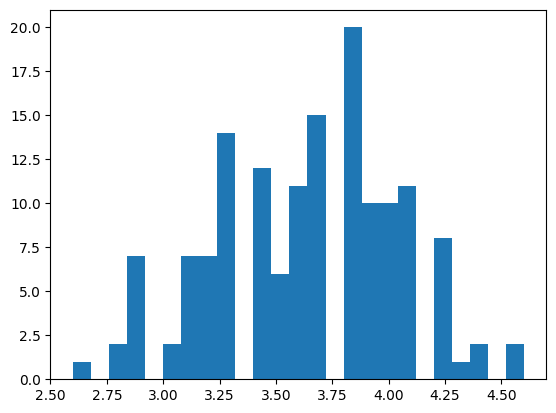

In [ ]:
plt.hist(df['rate'], bins = 25 )
plt.show()

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

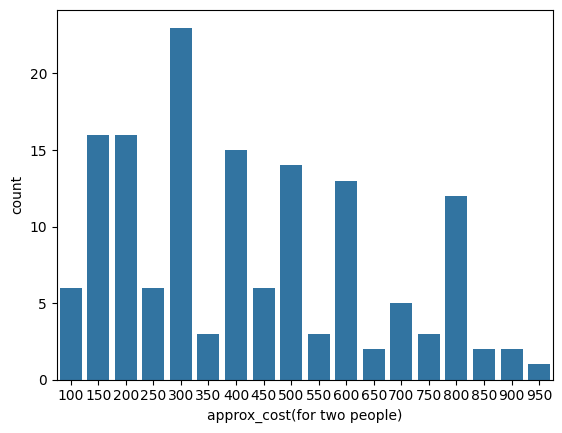

In [ ]:
cp_d = df['approx_cost(for two people)']
sns.countplot(x=cp_d)

<Axes: xlabel='online_order', ylabel='rate'>

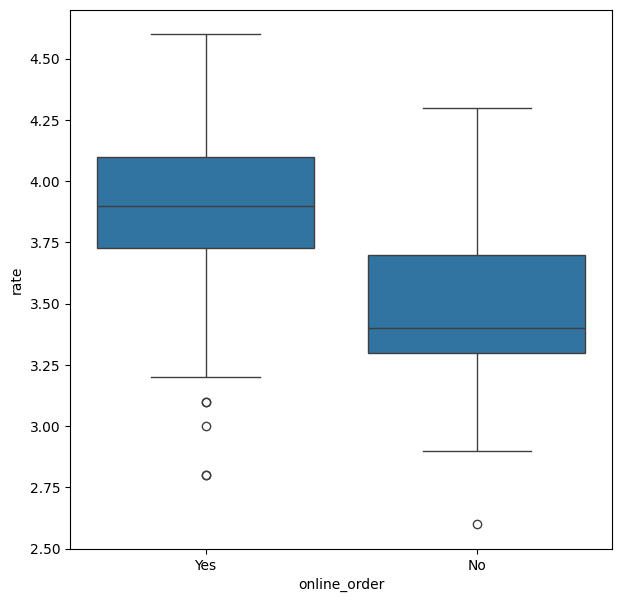

In [ ]:
plt.figure(figsize = ( 7,7 ))
sns.boxplot(x = 'online_order' , y = 'rate' , data = df)

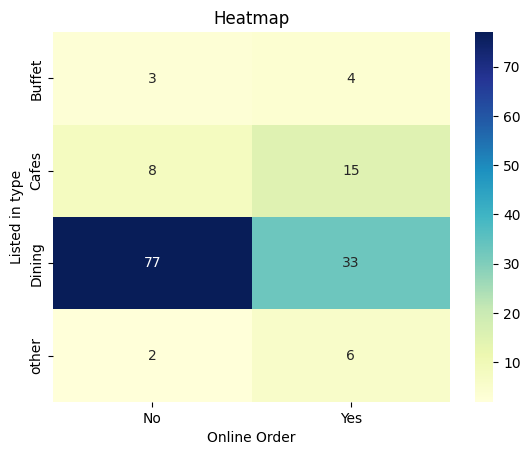

In [ ]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table , annot = True , cmap='YlGnBu' , fmt = 'd')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed in type")
plt.show()